In [1]:
import numpy as np
import seaborn as sns

In [2]:
def predict(X, W, b):
    """Used for predicting y given input X and weights (W, b)"""
    return X @ W + b

In [3]:
def loss(y, y_pred, W, lambd):
    """Used for calculating loss given original y and prediction y"""
    m = y.shape[0]
    return (0.5 / m) * (np.sum((y - y_pred) ** 2) + (lambd * np.sum(W ** 2)))

In [4]:
def grads(X, y, y_pred, W, lambd):
    """Used for calculating gradients for W, b ==> dW, db"""
    m = y.shape[0]
    dW = (1 / m) * ((X.T @ (y_pred - y)) + (lambd * W))
    db = (1 / m) * np.sum(y_pred - y, keepdims=True)
    return dW, db

In [5]:
def update(W, b, dW, db, alpha):
    """Used for updating variables W, b given dW, db"""
    W_ = W - (alpha * dW)
    b_ = b - (alpha * db)
    return W_, b_

In [6]:
def linear_model(X, y, alpha=0.03, iters=250, lambd=0):
    """
    Input :
    -> X     - Training Data (Features)
    -> y     - Training Data (Label)
    -> alpha - Learning Rate
    -> iters - Number of iterations
    
    Output :
    -> W, b  - Weights
    -> costs - History of costs while Training
    """
    W = np.zeros((X.shape[1], y.shape[1]))
    b = np.zeros((1, y.shape[1]))
    costs = []
    for i in range(iters):
        y_pred = predict(X, W, b)
        c = loss(y, y_pred, W, lambd)
        dW, db = grads(X, y, y_pred, W, lambd)
        W, b = update(W, b, dW, db, alpha)
        costs.append(c)
    return (W, b), costs

In [7]:
def r2_score(y, y_pred):
    return 1 - (np.sum((y - y_pred) ** 2) / np.sum((y - y.mean()) ** 2))

0.9999091879085859

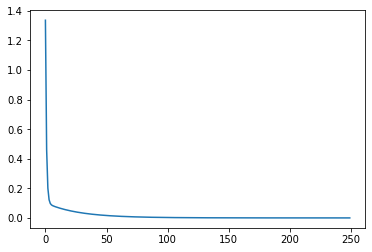

In [8]:
X = np.random.rand(1000, 2)
W = np.array([2, 1]).reshape(-1, 1)
b = np.array([[4]])
y = X @ W

(W, b), costs = linear_model(X, y, alpha=0.3, lambd=0.1)
sns.lineplot(data=costs)

y_pred = predict(X, W, b)

r2_score(y, y_pred)